In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 10)

**Metrics** in machine learning are needed to evaluate the quality of a model's performance, to understand how well the model has memorized patterns from the training sample.  

Today we continue to look at metrics for the **classification task**. For this task, we want our models to predict the correct object class label as often as possible.

<img src='https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png' width=600>


## Retrieving data

We will consider the ROC-AUC metric on a binary classification task. Let us take a dataset from the standard datasets in `sklearn` on breast cancer prediction `load_breast_cancer`.

There are 569 objects and 30 features.

In [95]:
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()

Let's wrap the data in a dataframe.

In [96]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,...,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,...,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,...,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,...,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,...,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,...,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,...,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,...,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,...,0.86810,0.9387,0.2650,0.4087,0.12400


The target variable is a binary trait:   
- 212 zeros is the class of malignant tumor (Malignant).   
- And 357 ones are the class of benign tumor (Benign).

In [97]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

Let's divide the sample into training and test samples. From the initial set we will take only two random features, and for the test we will take only 9 objects for easy calculation of metrics.

In [98]:
from sklearn.model_selection import train_test_split


np.random.seed(5)
features = np.random.randint(X.shape[1], size=2)


X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, features], y, test_size=9, random_state=4)

We obtained a sample for which we will calculate the ROC AUC metric.

In [99]:
X_test

,mean area,smoothness error
340,641.2,0.004577
382,447.8,0.005042
300,1217.0,0.006056
262,947.8,0.006717
363,838.1,0.007257
157,880.2,0.003443
120,403.3,0.006040
139,384.8,0.011270
99,642.5,0.008005


Six of them are in class 1 and three are in class 0.

In [100]:
y_test

340    1
382    1
300    0
262    0
363    1
157    1
120    1
139    1
99     0
dtype: int64

## Model training

And train a decision tree on tumor classification.

In [101]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=5)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

Our output machine learning models can give a label of the class the object belongs to via the predict method.

In [102]:
tree.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1])

And also the probability of belonging to each class via the predict_proba method.

In [103]:
tree.predict_proba(X_test)

array([[0.1509434 , 0.8490566 ],
       [0.03125   , 0.96875   ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.03370787, 0.96629213],
       [0.45454545, 0.54545455]])

Since there are only two classes we see 2 bars, bar 1 is the probability that the object is class zero and bar 2 is the probability that the object is class one.   
The probabilities add up to give a probability of 1.   

For example, the first object is most likely to be class 1 (85% of the object could be class 1, and 15% of the object could be class 0), and the third object is 100% certain to be class 0 (zero probability of being class 1, and unit probability of being class 0)

Operating on the probabilities we can independently decide above or below which mark, an object becomes class zero or class one. By default, this cutoff is 0.5.

Let's make sure of it. Let's use our hands to assign appropriate classes to objects with probabilities greater than 0.5. That is, if the probability of being class 1, is greater than or equal to 50%, then we put the object class 1, if the predicted probability of being class 1 is less than 50%, then we put the object labeled class 0. For this purpose, we have taken only the first column.

In [104]:
pred_proba = tree.predict_proba(X_test)
pred_proba

array([[0.1509434 , 0.8490566 ],
       [0.03125   , 0.96875   ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.03370787, 0.96629213],
       [0.45454545, 0.54545455]])

In [105]:
np.where(pred_proba[:, 1] >= 0.5, 1, 0)

array([1, 1, 0, 0, 0, 0, 1, 1, 1])

In [106]:
tree.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1])

We got exactly the same predicted class labels as they were after the predict method, so exactly, the default cutoff in predict methods is 0.5.

## Probability visualization

Let's visualize the probabilities of being class 1 of our 9 objects, with the ordinal number of objects on the abscissa axis and the probability of being class 1 on the ordinate axis, and color them according to the true class label.   
Orange are objects of class 0 and blue are objects of class 1.

At the same time there is a low probability to be the objects of both the first class and the zero class.

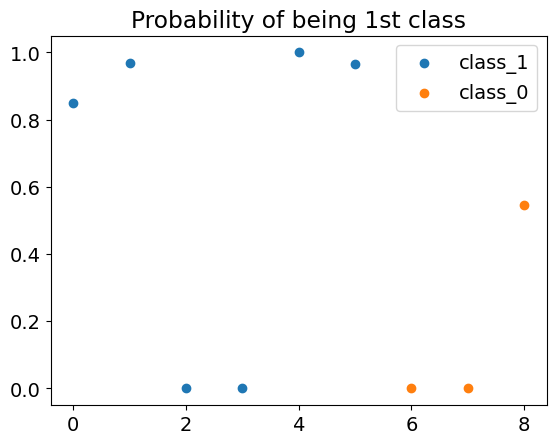

In [107]:
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.title('Probability of being 1st class')
plt.legend();

### Cutoff 0.5

As we have defined, the default cutoff is 0.5. Let's draw it as well.   
According to this cutoff, five objects will be classified as class 1, because their predicted probability is greater than 0.5, and four objects will be classified as class 0, because their predicted probabilities are less than 0.5.  
In this case, we mistakenly considered two objects of the first class as null classes, predicted their predicted probabilities small (0), and made False Negative errors.  
And there is one more object with another False Positive false positive error - it is a null class object, which we mistakenly considered to be a first class object because it was predicted to have a high probability of being a first class object (0.5454).

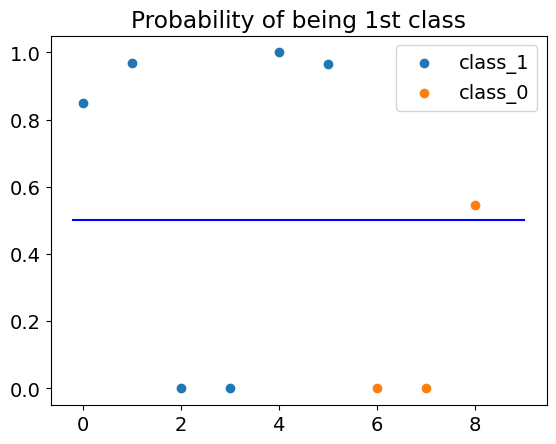

In [108]:
threshold = 0.5
class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

We can draw the error matrix for this case, we get 2 TN, 4 TP, 1 FP and 2 FN.

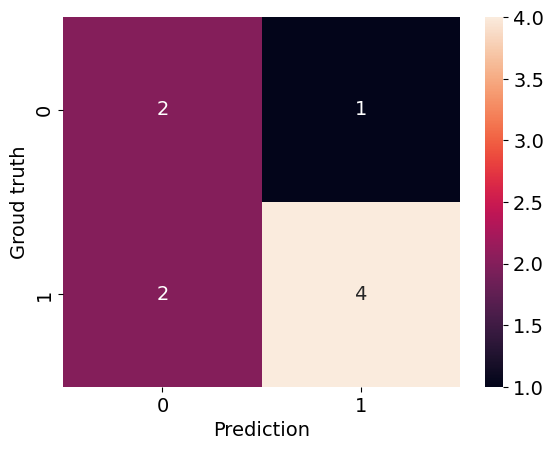

In [109]:
from sklearn.metrics import confusion_matrix


pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

And now we should talk about the calculation of the ROC-AUC metric. To get it we need to operate with two metrics, which are based on the error matrix - TPR and FPR.


**TPR (True Positive Rate)** is the ratio of the number of true positives to the size of the positive class:

$$TPR = \frac{TP}{TP+FN}$$

that is, TPR essentially represents completeness - how many times the model correctly found the target class among those people who are actually it.

This metric should ideally tend to one.


**FPR (False Positive Rate)** - the ratio of the number of false positives to the total size of the negative class:

$$FPR = \frac{FP}{FP+TN}$$

and here we have a certain analog of completeness for errors only - how many times the model erroneously found the target class among all people of the non-target class.

This metric should ideally tend to zero.

Let's calculate TPR and FPR. Take the values from the error matrix and substitute them into the formulas.

In [110]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

We see that TPR, aka recall for the target class at cutoff 0.5 is not bad, and FPR - error recall is sufficient at cutoff 0.5 is small, which is also not bad.

In [111]:
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.6666666666666666
FPR 0.3333333333333333


### Cutoff 0.6

At the same time, we can change the cutoff of 0.5 as we wish.

If we want to increase the purity of classification, and thus reduce the FPR, we can raise the cutoff, for example, to 0.6, in this case our False Positive error is removed, because the predicted probability will now be smaller. This means that there are no more false positive errors and FPR will be equal to zero.

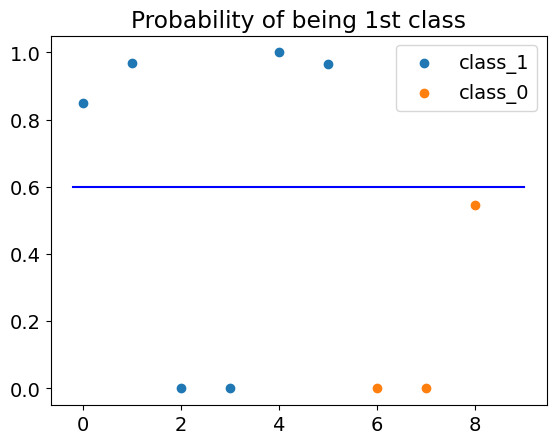

In [112]:
threshold = 0.6

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

Let's calculate the error matrix and see that there are no more false alarm errors. And hence FPR - the fraction of false errors is perfect - zero.

TPR 0.6666666666666666
FPR 0.0


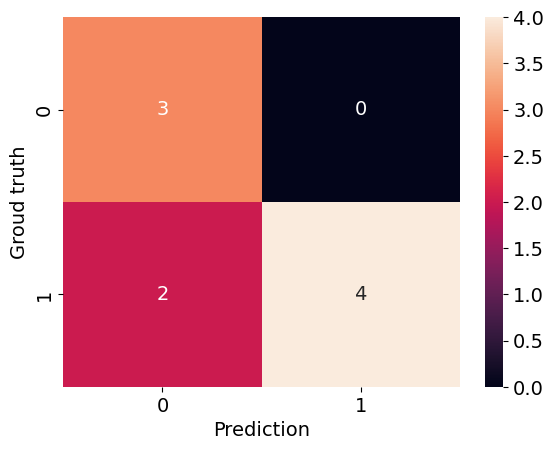

In [113]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

### Cutoff 0

And we can do it in another way: reduce the cutoff to 0, thus we will classify all objects as first class. This means we will find all objects of the first class. There are no more false miss errors, and the TPR or Recall metric will be one.

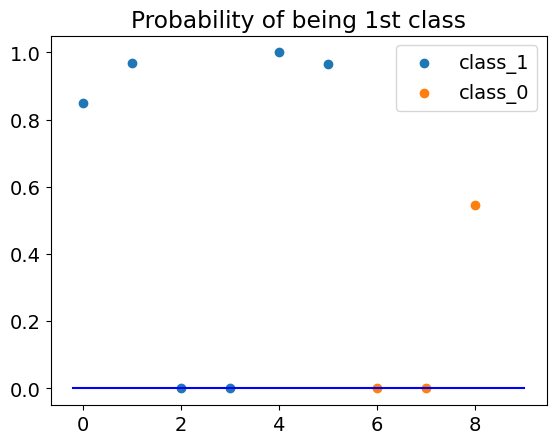

In [114]:
threshold = 0

class_1 = pred_proba[:, 1][y_test == 1]
class_0 = pred_proba[:, 1][y_test == 0]

pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

Let's calculate the error matrix and now there are no more false omission errors, just as there are no classifications in the null class. But we see that FPR is equal to 1 - this is bad, it means that we made all possible errors in FP predictions.

TPR 1.0
FPR 1.0


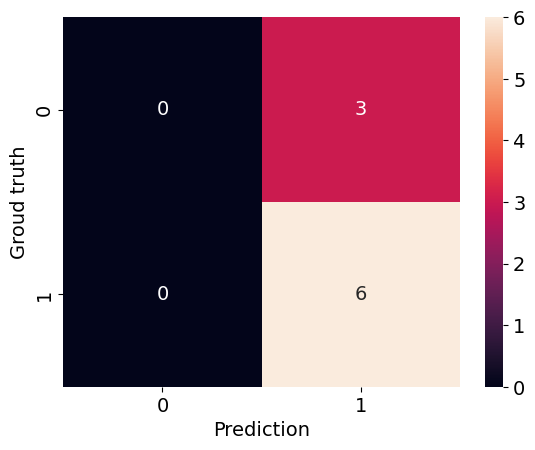

In [115]:
cm = confusion_matrix(y_test, pred)
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

## ROC-curve

The ROC-curve and ROC-AUC metric is built on these different cutoffs. It is a curve consisting of points with different cutoffs.  
Below is an example of a ROC curve on a training sample. Different cutoffs are selected and the TPR and FPR metrics are counted, then the points are plotted. The line starts at point (0, 0) where FPR is zero and TPR is zero and ends at point (1, 1) where FPR is one and TPR is the same.

Ideally, when the ROC-curve passes through the point (0, 1), where the ideal FPR is zero - there is no single FP error, and the same ideal TPR (recall), saying that there is no single FN error, but on real data you will not meet such a thing, only on synthetic artificial samples.

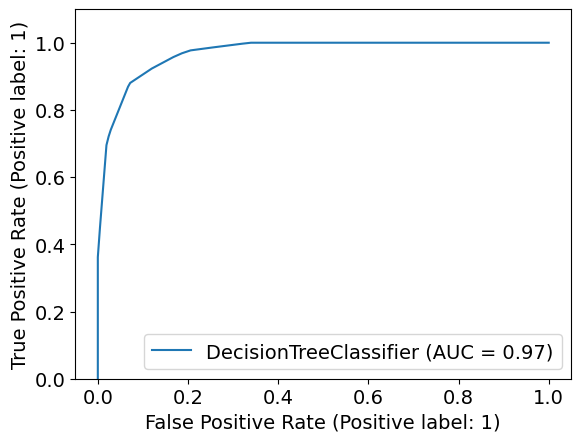

In [116]:
from sklearn.metrics import RocCurveDisplay, roc_curve

RocCurveDisplay.from_estimator(tree, X_train, y_train)
plt.ylim([0, 1.1]);

Let's calculate the ROC curve on the test sample ourselves.

Let's combine the predicted probabilities of being first class and the true target values into a dataframe and sort by sample, small probabilities first, then large probabilities.

In [117]:
df_pred = pd.DataFrame({
    'proba': pred_proba[:, 1],
    'label': y_test
})

df_pred = df_pred.sort_values(by='proba')
df_pred

,proba,label
300,0.000000,0
262,0.000000,0
363,0.000000,1
157,0.000000,1
99,0.545455,0
340,0.849057,1
139,0.966292,1
382,0.968750,1
120,1.000000,1


Ideally, there should be a cutoff above which there are only objects of the first class and below which there are objects of the zero class, but in our task with such predictions it is not so, we can not draw such a boundary, there will still be either false miss errors (FN), if we set the cutoff to 0.6, or false positive errors (FP), if we set the cutoff to 0.

### Cutoff 1

Still, let's proceed to the construction of the ROC-curve and start by calculating the luck of the metrics at the highest cutoff equal to 1.  
In this case, 8 out of 9 objects will be classified as zero class, because they all have predicted probability less than 1 and only one object with a cutoff of 1 will be classified by the model as the first class.

In [118]:
threshold = 1
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
300,0.000000,0,0
262,0.000000,0,0
363,0.000000,1,0
157,0.000000,1,0
99,0.545455,0,0
340,0.849057,1,0
139,0.966292,1,0
382,0.968750,1,0
120,1.000000,1,1


We get that TPR will be $\frac{TP}{TP + FN} = \frac{1}{1 + 5} = 0.167$, because we found only one unit out of 6 possible units.

And FPR would be $\frac{FP}{FP + TN} = \frac{0}{0 + 3} = 0$

TPR 0.16666666666666666
FPR 0.0


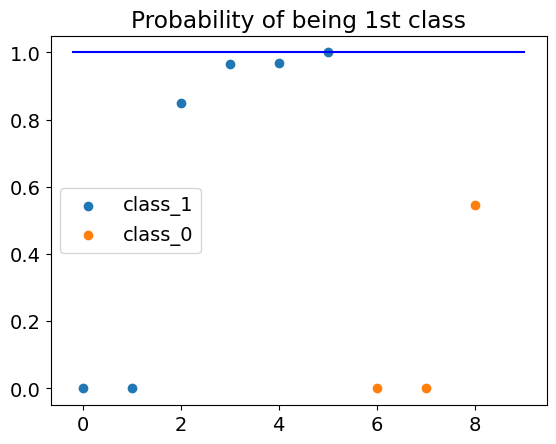

In [119]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

These values of FPR and TPR give us the first point, (0.167, 0).

In [120]:
TPRs = [0]
FPRs = [0]

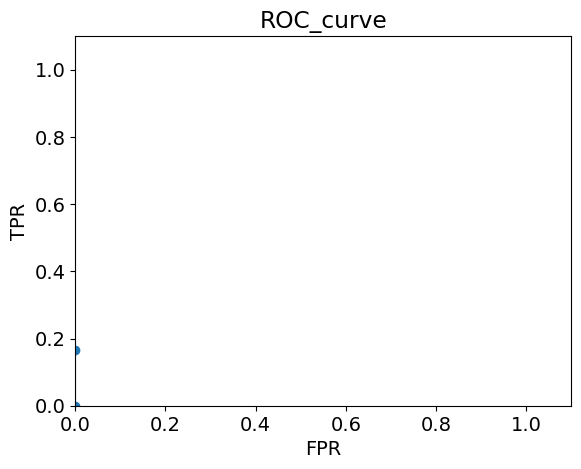

In [121]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

### Cutoff 0.84

We reduce the cutoff to the point where we have found all TP up to the first FP, i.e. this cutoff value is 0.84. If we had taken a cutoff greater than this value, but less than 1, the curve would not change in any way, TPR would increase, but FPR would be equal to zero, the points would be on the same line.

Now 5 out of 9 objects will be classified as class zero, and 4 objects have a sample greater than our cutoff, so they will be classified as class one.

In [122]:
threshold = 0.84
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
300,0.000000,0,0
262,0.000000,0,0
363,0.000000,1,0
157,0.000000,1,0
99,0.545455,0,0
340,0.849057,1,1
139,0.966292,1,1
382,0.968750,1,1
120,1.000000,1,1


TPR will be $\frac{TP}{TP + FN} = \frac{4}{4 + 2} = 0.667$, because we found 4 units out of 6 possible units.

And FPR would be $\frac{FP}{FP + TN} = \frac{0}{0 + 3} = 0$, there is no misclassification of FP yet.

TPR 0.6666666666666666
FPR 0.0


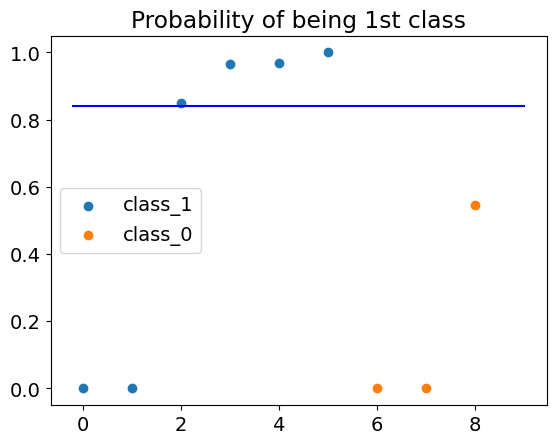

In [123]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

These FPR and TPR values give us the second point, (0.667, 0).

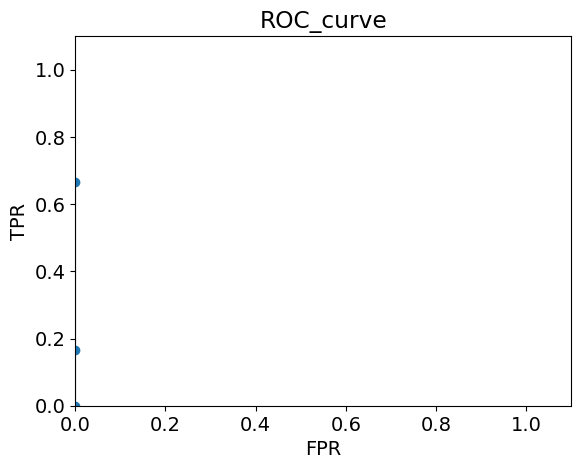

In [124]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

### Cutoff 0.54

We go further and lower the cutoff to 0.54 to allow for the first FP error and change the value of the FPR metric.

Now 4 out of 9 objects will be classified as class zero and 5 objects will be categorized as class one.

In [125]:
threshold = 0.54
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
300,0.000000,0,0
262,0.000000,0,0
363,0.000000,1,0
157,0.000000,1,0
99,0.545455,0,1
340,0.849057,1,1
139,0.966292,1,1
382,0.968750,1,1
120,1.000000,1,1


TPR has not changed in any way, no new TP has been found and TPR will be equal to $\frac{TP}{TP + FN} = \frac{4}{4 + 2} = 0.667$.

And the completeness for the negative class became larger, FPR would be $\frac{FP}{FP + TN} = \frac{1}{1 + 2} = 0.334$

TPR 0.6666666666666666
FPR 0.3333333333333333


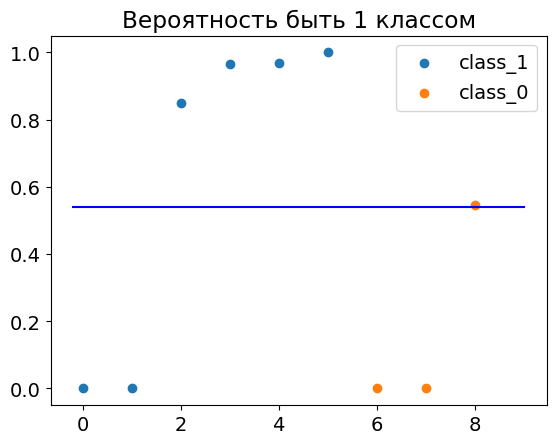

In [126]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

These FPR and TPR values give us the third point, (0.334, 0.667).

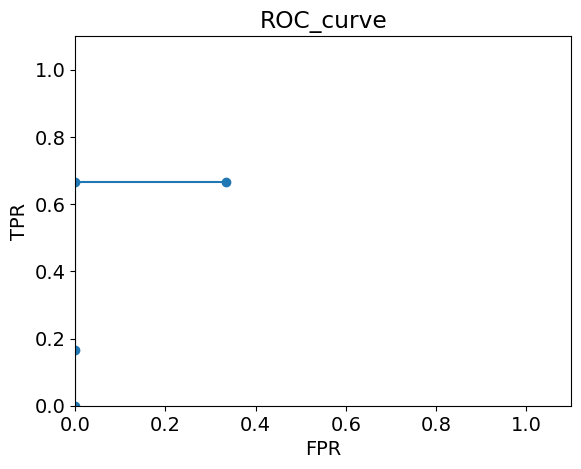

In [127]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

### Cutoff 0

Now we change the cutoff again to the value where all units are found before the new FP error appears, i.e. to 0.

Now all objects will be classified as first class.

In [128]:
threshold = 0
df_pred['pred_label'] = (df_pred['proba'] >= threshold).astype('int')

df_pred

,proba,label,pred_label
300,0.000000,0,1
262,0.000000,0,1
363,0.000000,1,1
157,0.000000,1,1
99,0.545455,0,1
340,0.849057,1,1
139,0.966292,1,1
382,0.968750,1,1
120,1.000000,1,1


TPR is perfect, since all objects of the first class are found, it is equal to $\frac{TP}{TP + FN} = \frac{6}{6 + 0} = 1$.

And similarly for the negative class, all potential errors are found, FPR is $\frac{FP}{FP + TN} = \frac{3}{3 + 0} = 1$

TPR 1.0
FPR 1.0


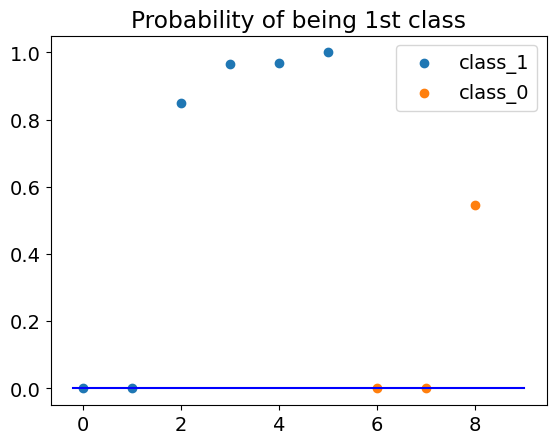

In [129]:
class_1 = df_pred[df_pred.label == 1]
class_0 = df_pred[df_pred.label == 0]

cm = confusion_matrix(df_pred['label'], df_pred['pred_label'])
TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

plt.scatter(np.arange(len(class_1)), class_1['proba'], label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0['proba'], label='class_0')
plt.plot([-0.2, len(df_pred)], [threshold, threshold], c='b')
plt.title('Probability of being 1st class')
plt.legend();

These values of FPR and TPR give us the fourth point, (1, 1).

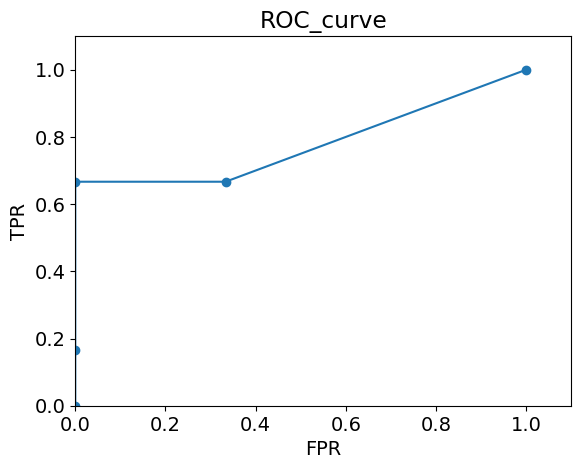

In [130]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

We could get the same curve through sklearn if we call the `roc_curve` function, its output is a list of FPR metrics, a list of TPR metrics, and a list of cutoffs.

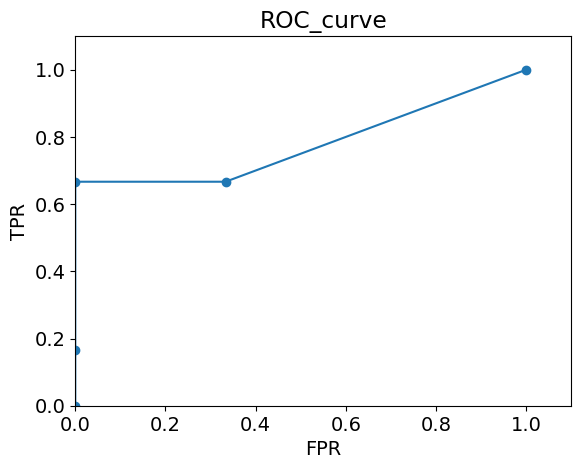

In [131]:
fprs, tprs, thr = roc_curve(y_test, pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

## ROC-AUC

We can also find out the area under the curves, the results will be the same.  
In this case we calculate the area through the function `auc` (area under curve) from `sklearn`.

We get the same ROC-AUC metrics for our problem.

In [132]:
from sklearn.metrics import auc

auc(fprs, tprs), auc(FPRs, TPRs)

(0.7777777777777778, 0.7777777777777778)

# Summary

<table>

<tr>
<td>

<b>Metric</b>

</td>

<td>

<b>Definition area</b>

</td>

<td>

<b>Ideal</b>

</td>

</tr>

<tr>
<td>

ROC-curve

</td>

<td>

the curve starts at point (0,0)<br>and ends at point (1, 1).

</td>

<td>

The higher the curve, the better the algorithm.

</td>

</tr>



<tr>
<td>

ROC-AUC

</td>

<td>

[0, 1]

</td>

<td>

1

</td>

</tr>


<table>